In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [648]:
orders = pd.read_csv('List of Orders.csv')
orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [649]:
details = pd.read_csv('Order Details.csv')
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [650]:
target = pd.read_csv('Sales target.csv')
target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


## Vorverarbeitung von Daten
Datenbereinigung  
Bei diesem Datensatz besteht der Prozess der Datenbereinigung aus folgenden Schritten:  

1.Ändern der Variablen in geeignete Datentypen  
2.Entfernen von Nullwerten

In [651]:
print('orders')
display(orders.head())
orders.info()
print('______________________________________________________________________')
print('details')
display(details.head())
details.info()
print('______________________________________________________________________')
print('target')
display(target.head())
target.info()
print('______________________________________________________________________')

orders


,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
______________________________________________________________________
details


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB
______________________________________________________________________
target


,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes
______________________________________________________________________


In [652]:
orders['Order Date'] = orders['Order Date'].astype('datetime64[ns]')

In [653]:
# Überprüfung auf fehlende Werte
orders.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [654]:
# Überprüfen dieser Werte
orders[orders.isnull().any(axis=1)]

,Order ID,Order Date,CustomerName,State,City
500,NaN,NaT,NaN,NaN,NaN
501,NaN,NaT,NaN,NaN,NaN
502,NaN,NaT,NaN,NaN,NaN
503,NaN,NaT,NaN,NaN,NaN
504,NaN,NaT,NaN,NaN,NaN
505,NaN,NaT,NaN,NaN,NaN
506,NaN,NaT,NaN,NaN,NaN
507,NaN,NaT,NaN,NaN,NaN
508,NaN,NaT,NaN,NaN,NaN
509,NaN,NaT,NaN,NaN,NaN


In [655]:
# Entfernen von fehlenden Werten
orders = orders.dropna()
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


In [656]:
# Sicherstellen, dass keine Null-Werte mehr vorhanden sind
orders.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [657]:
# Überprüfung der fehlenden Werte im Detail
details.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [658]:
# Überprüfung der fehlenden Werte im target
target.isnull().sum()

Month of Order Date    0
Category               0
Target                 0
dtype: int64

In [659]:
# Umwandlung der Kategorie-Variable in data

target['Category'] = target['Category'].astype('category')
target['Month of Order Date'] = pd.to_datetime(target['Month of Order Date'], format='%b-%y')
target.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month of Order Date  36 non-null     datetime64[ns]
 1   Category             36 non-null     category      
 2   Target               36 non-null     float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 876.0 bytes


In [660]:
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


Erstellen eines neuen DataFrames, der den Amount, den Profit und die Menge der verschiedenen Bestellungen enthält.
Dann wird er mit dem Orders-Dataset anhand der Order ID als Primary Key zusammengeführt.

In [661]:
profit = details.groupby(['Order ID', 'Category'])[['Amount', 'Profit', 'Quantity']].sum().reset_index()
profit.head()

,Order ID,Category,Amount,Profit,Quantity
0,B-25601,Clothing,74.0,-14.0,8
1,B-25601,Electronics,80.0,-56.0,4
2,B-25601,Furniture,1275.0,-1148.0,7
3,B-25602,Clothing,680.0,207.0,11
4,B-25602,Electronics,3209.0,768.0,11


In [662]:
# Zusammenführen der Datensätze
df_total = pd.merge(orders, profit)
df_total.head()

,Order ID,Order Date,CustomerName,State,City,Category,Amount,Profit,Quantity
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Clothing,74.0,-14.0,8
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Electronics,80.0,-56.0,4
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,Furniture,1275.0,-1148.0,7
3,B-25602,2018-01-04,Pearl,Maharashtra,Pune,Clothing,680.0,207.0,11
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,Electronics,3209.0,768.0,11


In [663]:
# Berechnung des Amounts und des Profits über den gesamten Zeitraum
total_amount = df_total['Amount'].sum()
total_profit = df_total['Profit'].sum()

print(f"Amount: {total_amount}")
print(f"Profit: {total_profit}")


Amount: 431502.0
Profit: 23955.0


In [664]:
# Durchschnittlicher Profit pro Bestellung
profit_per_order = df_total.groupby('Order ID')[['Profit']].sum()
average_profit_per_order = profit_per_order['Profit'].mean()

print(f"Durchschnittlicher Profit pro Bestellung: {average_profit_per_order}")

Durchschnittlicher Profit pro Bestellung: 47.91


Erstellen von Diagrammen für Profit und Amount

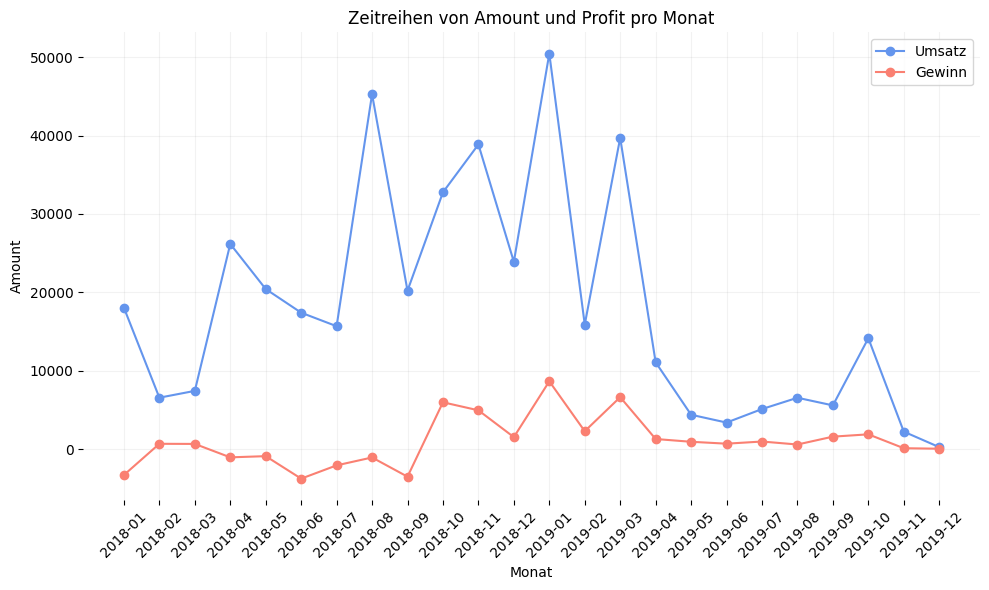

In [665]:
df_total['Month'] = df_total['Order Date'].dt.to_period('M')

monthly_data = df_total.groupby('Month')[['Amount', 'Profit']].sum()

plt.figure(figsize=(10, 6))

plt.plot(monthly_data.index.astype(str), monthly_data['Amount'], color='cornflowerblue', label='Umsatz', marker='o')

plt.plot(monthly_data.index.astype(str), monthly_data['Profit'], color='salmon', label='Gewinn', marker='o')

plt.title('Zeitreihen von Amount und Profit pro Monat')
plt.xlabel('Monat')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True, axis='both', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)  

plt.legend()

plt.tight_layout()  
plt.show()

# Analyse der Zielverwirklichung (Sales Target)


In [666]:
# Zusammenführen des Datensatzes nach Monaten und Kategorien
df_total_month_cat = df_total.groupby(['Month', 'Category'])[['Amount', 'Profit', 'Quantity']].sum().reset_index()
df_total_month_cat.head()

,Month,Category,Amount,Profit,Quantity
0,2018-01,Clothing,5355.0,-602.0,119
1,2018-01,Electronics,7624.0,630.0,51
2,2018-01,Furniture,5056.0,-3324.0,33
3,2018-02,Clothing,1662.0,51.0,17
4,2018-02,Electronics,3763.0,600.0,21


In [667]:
# Extrahieren des Monats
target['Month'] = target['Month of Order Date'].dt.to_period('M')

In [668]:
# Zusammenführen der Datensätze
df_total_target = pd.merge(df_total_month_cat, target, on=['Month', 'Category'], how='inner')
df_total_target.head()

,Month,Category,Amount,Profit,Quantity,Month of Order Date,Target
0,2018-04,Clothing,10743.0,429.0,226,2018-04-01,12000.0
1,2018-04,Electronics,8857.0,-1290.0,61,2018-04-01,9000.0
2,2018-04,Furniture,6570.0,-182.0,50,2018-04-01,10400.0
3,2018-05,Clothing,6986.0,300.0,177,2018-05-01,12000.0
4,2018-05,Electronics,8759.0,-710.0,70,2018-05-01,9000.0


In [669]:
# Berechnung des Prozentsatzes der Zielverwirklichung
df_total_target['Achievement (%)'] = (df_total_target['Amount'] / df_total_target['Target']) * 100
df_total_target.head()

,Month,Category,Amount,Profit,Quantity,Month of Order Date,Target,Achievement (%)
0,2018-04,Clothing,10743.0,429.0,226,2018-04-01,12000.0,89.525000
1,2018-04,Electronics,8857.0,-1290.0,61,2018-04-01,9000.0,98.411111
2,2018-04,Furniture,6570.0,-182.0,50,2018-04-01,10400.0,63.173077
3,2018-05,Clothing,6986.0,300.0,177,2018-05-01,12000.0,58.216667
4,2018-05,Electronics,8759.0,-710.0,70,2018-05-01,9000.0,97.322222


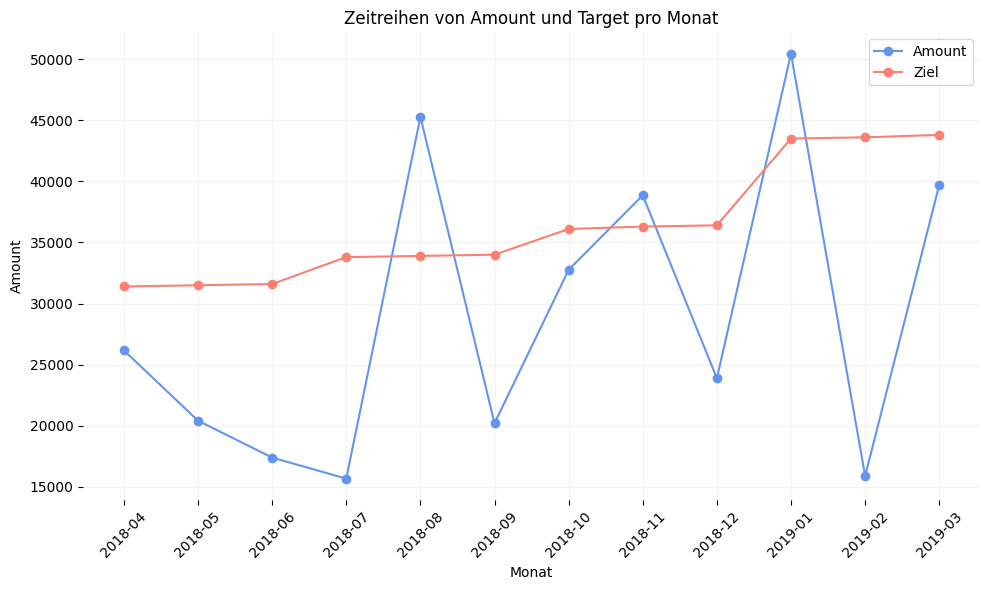

In [670]:
monthly_data_targ = df_total_target.groupby('Month')[['Amount', 'Target']].sum()

plt.figure(figsize=(10, 6))

plt.plot(monthly_data_targ.index.astype(str), monthly_data_targ['Amount'], color='cornflowerblue', label='Amount', marker='o')

plt.plot(monthly_data_targ.index.astype(str), monthly_data_targ['Target'], color='salmon', label='Ziel', marker='o')

plt.title('Zeitreihen von Amount und Target pro Monat')
plt.xlabel('Monat')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True, axis='both', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False) 

plt.legend()

plt.tight_layout()  
plt.show()

Visualisierung der Planerfüllung nach Kategorien

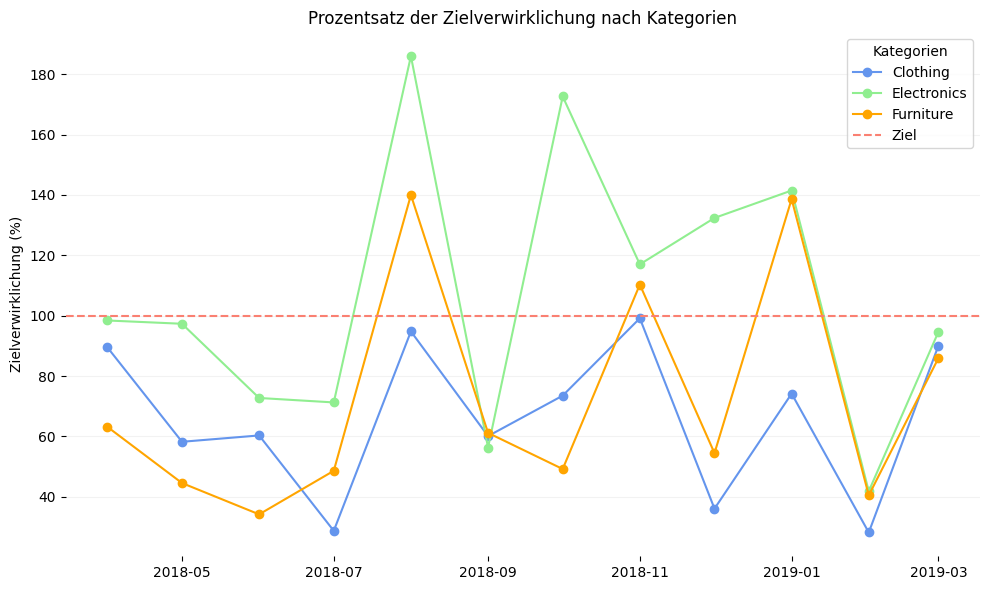

In [671]:
colors = ['cornflowerblue', 'lightgreen', 'orange']  

plt.figure(figsize=(10, 6))

for i, category in enumerate(df_total_target['Category'].unique()):
    category_data = df_total_target[df_total_target['Category'] == category]
    plt.plot(category_data['Month of Order Date'], category_data['Achievement (%)'], 
             marker='o', label=category, color=colors[i % len(colors)])

# Einstellungen des Diagramms
plt.axhline(y=100, color='salmon', linestyle='--', label='Ziel')
plt.title('Prozentsatz der Zielverwirklichung nach Kategorien')
#plt.xlabel('Monat')
plt.ylabel('Zielverwirklichung (%)')
#plt.xticks()
plt.legend(title='Kategorien')
plt.grid(True, axis='y', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Analyse der Kategorien und Unterkategorien


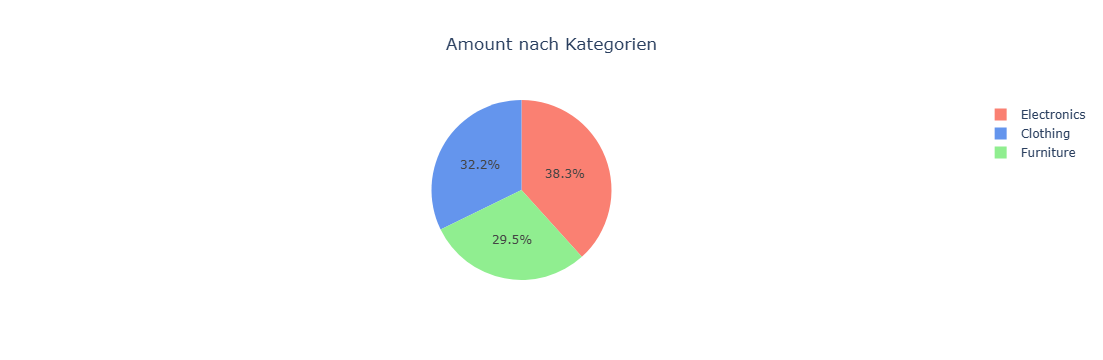

In [672]:
details_category = details.groupby('Category')[['Amount']].sum().reset_index()
fig = px.pie(details_category, values='Amount', names='Category', color='Category',
             color_discrete_map={'Clothing':'cornflowerblue',
                                 'Electronics':'salmon',
                                 'Furniture':'lightgreen'},
            title='Amount nach Kategorien')
fig.update_layout(title_x=0.5)
fig.show()

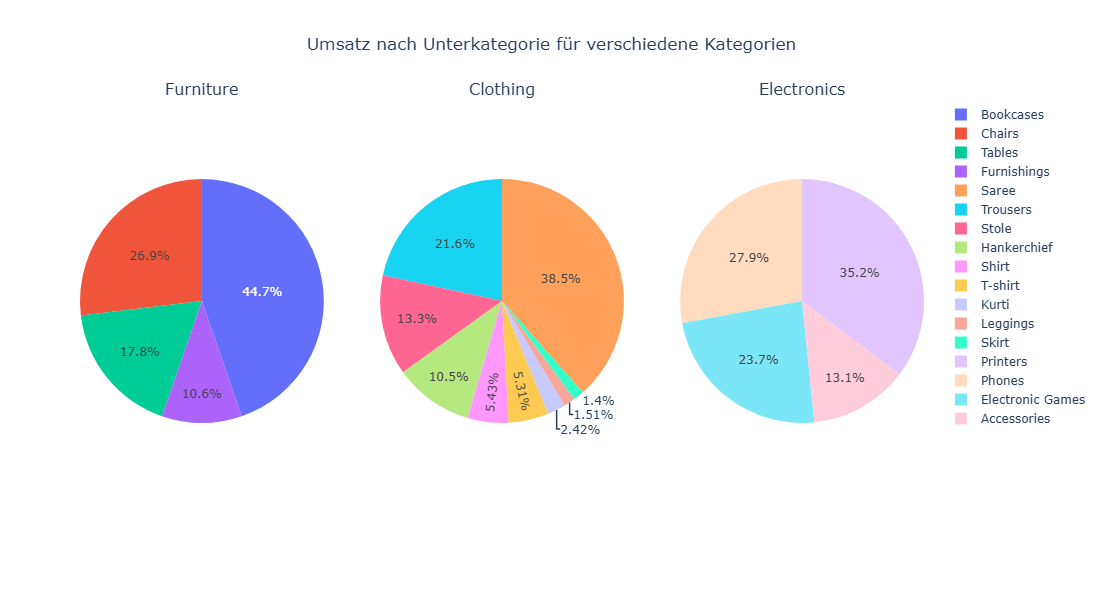

In [673]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['Furniture', 'Clothing', 'Electronics'],
                    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]])

fig.add_trace(go.Pie(labels=details[details['Category'] == 'Furniture']['Sub-Category'], values=details[details['Category'] == 'Furniture']['Amount']),
              row=1, col=1)
fig.add_trace(go.Pie(labels=details[details['Category'] == 'Clothing']['Sub-Category'], values=details[details['Category'] == 'Clothing']['Amount']),
              row=1, col=2)
fig.add_trace(go.Pie(labels=details[details['Category'] == 'Electronics']['Sub-Category'], values=details[details['Category'] == 'Electronics']['Amount']),
              row=1, col=3)

fig.update_layout(title_text='Umsatz nach Unterkategorie für verschiedene Kategorien', height=600)

fig.update_layout(title_x=0.5)

fig.show()

# Geografische Analyse


In [674]:
# Tabelle nach Ländern
state_sales = df_total.groupby('State')[['Amount','Profit']].sum().reset_index()
state_sales.head()

,State,Amount,Profit
0,Andhra Pradesh,13256.0,-496.0
1,Bihar,12943.0,-321.0
2,Delhi,22531.0,2987.0
3,Goa,6705.0,370.0
4,Gujarat,21058.0,465.0


Erstellen von Diagrammen für Profit und Amount nach Ländern

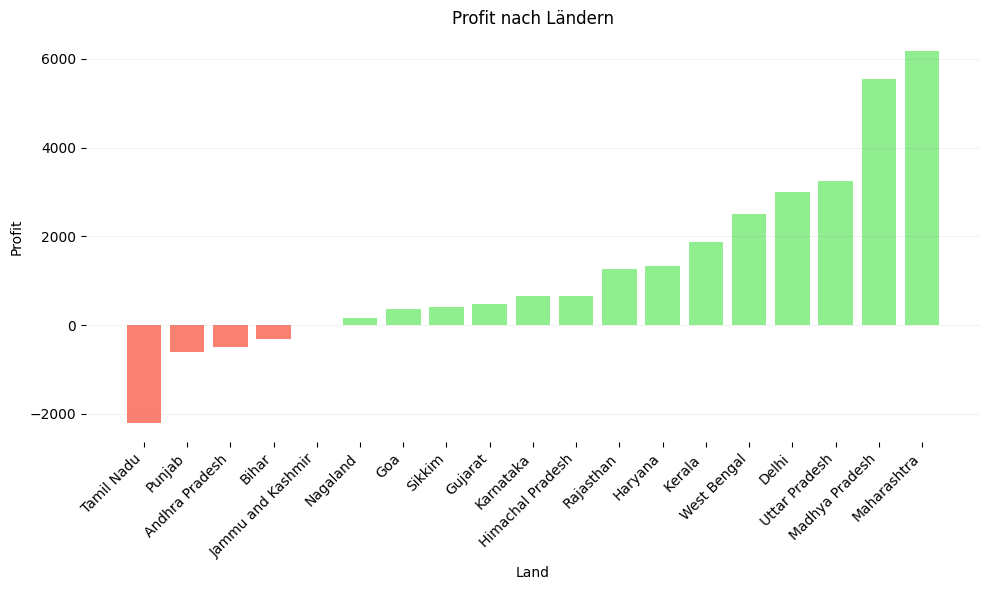

In [675]:
df_sorted = state_sales.sort_values(by='Profit', ascending=True)

colors = ['salmon' if x < 0 else 'lightgreen' for x in df_sorted['Profit']]

plt.figure(figsize=(10, 6))

plt.bar(df_sorted['State'], df_sorted['Profit'], color=colors)

plt.title('Profit nach Ländern')
plt.xlabel('Land')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, axis='y', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

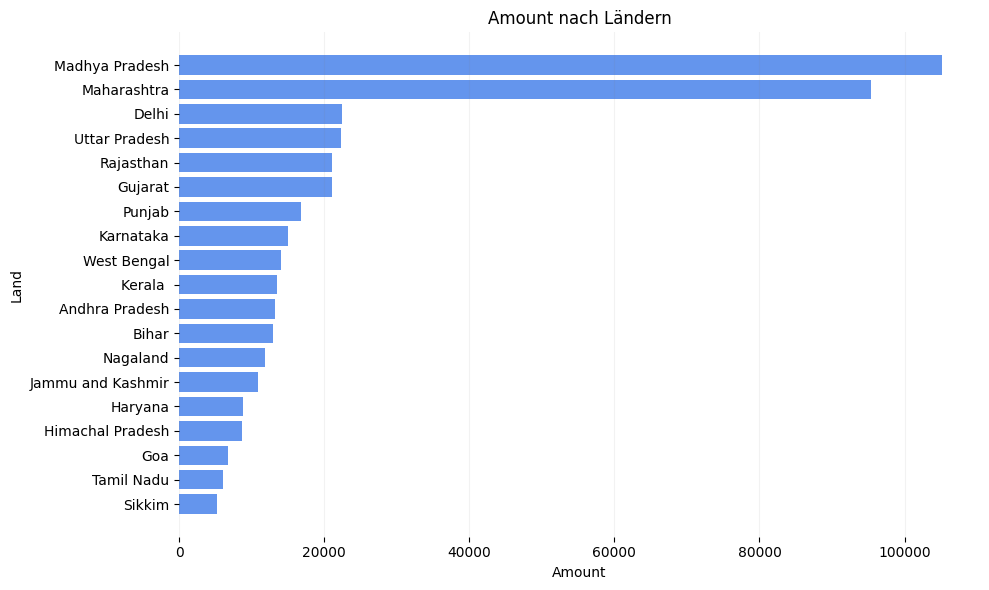

In [676]:
df_sorted_amount = state_sales.sort_values(by='Amount', ascending=True)

plt.figure(figsize=(10, 6))

plt.barh(df_sorted_amount['State'], df_sorted_amount['Amount'], color='cornflowerblue')

plt.title('Amount nach Ländern')
plt.xlabel('Amount')
plt.ylabel('Land')
plt.grid(True, axis='x', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Kundenanalyse


In [677]:
# Anzahl der einzigartigen Kunden
unique_customers = orders['CustomerName'].nunique()
print(f"Anzahl der einzigartigen Kunden: {unique_customers}")

Anzahl der einzigartigen Kunden: 332


In [678]:
# Durchschnittliche Anzahl der Bestellungen pro Kunde
avg_orders_per_customer = orders['CustomerName'].value_counts().mean()
print(f"Durchschnittliche Anzahl der Bestellungen pro Kunde: {avg_orders_per_customer:.2f}")

Durchschnittliche Anzahl der Bestellungen pro Kunde: 1.51


# Top-10 Kunden nach Amount

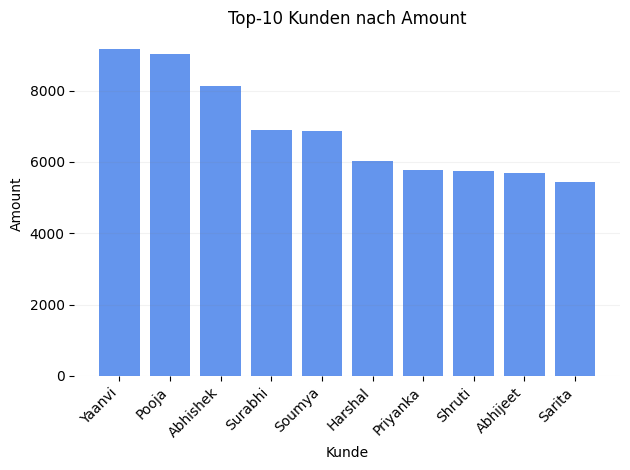

In [679]:
top_customers = df_total.groupby('CustomerName')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.bar(top_customers['CustomerName'], top_customers['Amount'], color='cornflowerblue')

plt.title('Top-10 Kunden nach Amount')
plt.xlabel('Kunde')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, axis='y', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Saisonale Analyse
Wir analysieren Trend, Saisonalität und Rauschen

In [680]:
df_time_series = df_total_month_cat.groupby('Month')[['Amount']].sum().reset_index()

In [681]:
df_time_series.head()

,Month,Amount
0,2018-01,18035.0
1,2018-02,6566.0
2,2018-03,7434.0
3,2018-04,26170.0
4,2018-05,20422.0


In [682]:
df_time_series.index = pd.date_range(start = '2018-01', periods = len(df_time_series.index), freq = 'ME').to_period()

In [683]:
df_time_series.index = df_time_series.index.to_timestamp()

In [684]:
df_time_series.head()

,Month,Amount
2018-01-01,2018-01,18035.0
2018-02-01,2018-02,6566.0
2018-03-01,2018-03,7434.0
2018-04-01,2018-04,26170.0
2018-05-01,2018-05,20422.0


In [685]:
decomp = seasonal_decompose(df_time_series['Amount'], model = 'additive')

In [686]:
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

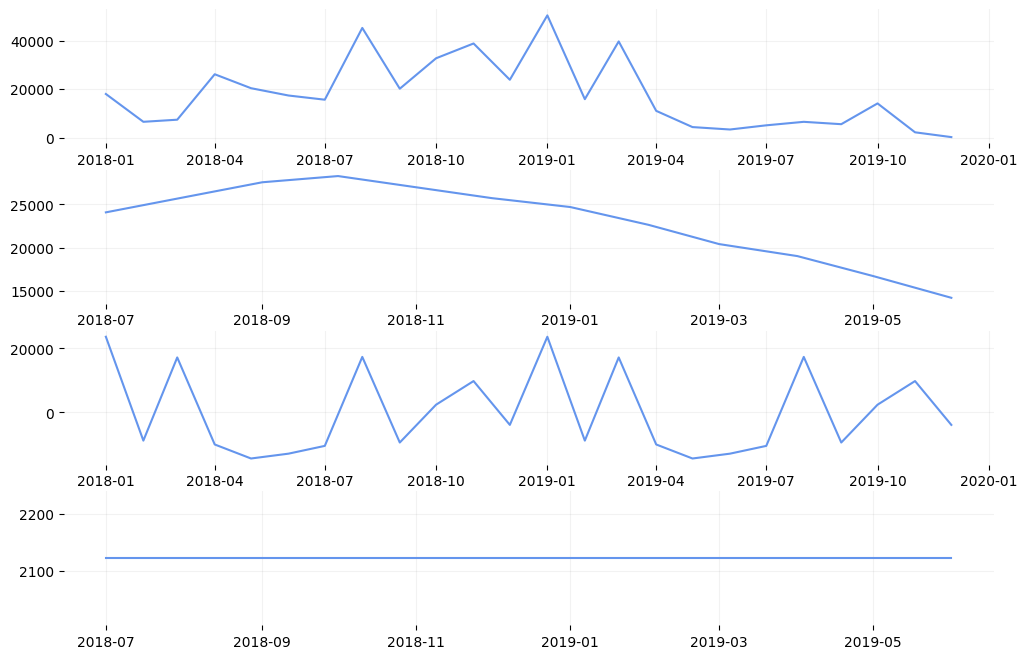

In [687]:
plt.figure(figsize = (12,8))

plt.subplot(411)
plt.plot(df_time_series['Amount'], label = 'Original', color='cornflowerblue')
plt.grid(True, axis='both', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.subplot(412)
plt.plot(trend, label = 'trend', color='cornflowerblue')
plt.grid(True, axis='both', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.subplot(413)
plt.plot(seasonal, label = 'seasonal', color='cornflowerblue')
plt.grid(True, axis='both', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.subplot(414)
plt.plot(residual, label = 'residual', color='cornflowerblue')
plt.grid(True, axis='both', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)
plt.show()

## Prognose

Da eine ausgeprägte Saisonalität sichtbar ist, wählen wir für die Prognose das SARIMA-Modell.

In [688]:
# Aufteilen der Daten in Trainings- und Testdaten
train_size = int(len(df_time_series) * 0.8) 
train_size, test = df_time_series[0:train_size], df_time_series[train_size:]

In [689]:
train_size.shape, test.shape

((19, 2), (5, 2))

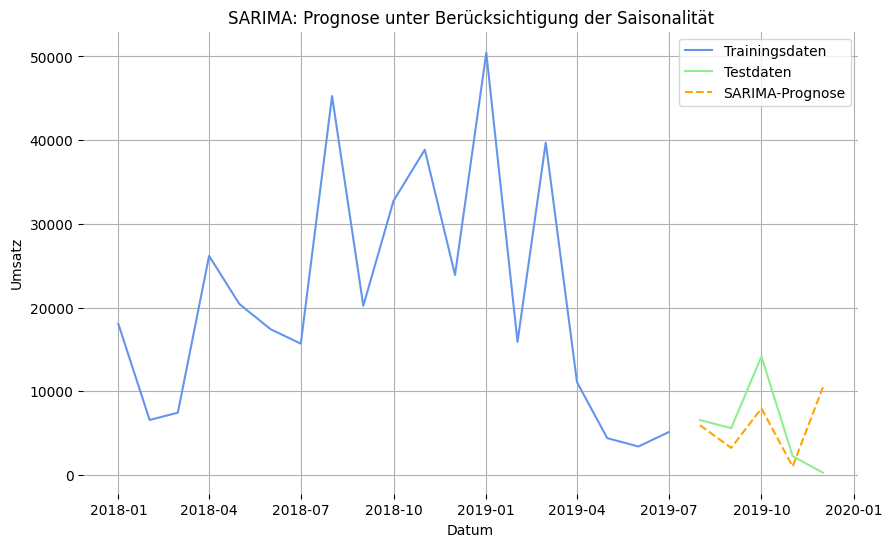

In [690]:
# Erstellung und Training des SARIMA-Modells
model = SARIMAX(train_size['Amount'], 
                order=(1, 1, 1),              
                seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Prognose für die Testdaten
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train_size.index, train_size['Amount'], label='Trainingsdaten', color='cornflowerblue')
plt.plot(test.index, test['Amount'], label='Testdaten', color='lightgreen')
plt.plot(test.index, forecast, label='SARIMA-Prognose', linestyle='--', color='orange')
plt.title('SARIMA: Prognose unter Berücksichtigung der Saisonalität')
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.legend()
plt.grid()

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.show()

In [691]:
# Bewertung der Modellqualität

mae = mean_absolute_error(test['Amount'], forecast)
rmse = np.sqrt(mean_squared_error(test['Amount'], forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 4128.10
RMSE: 5488.26


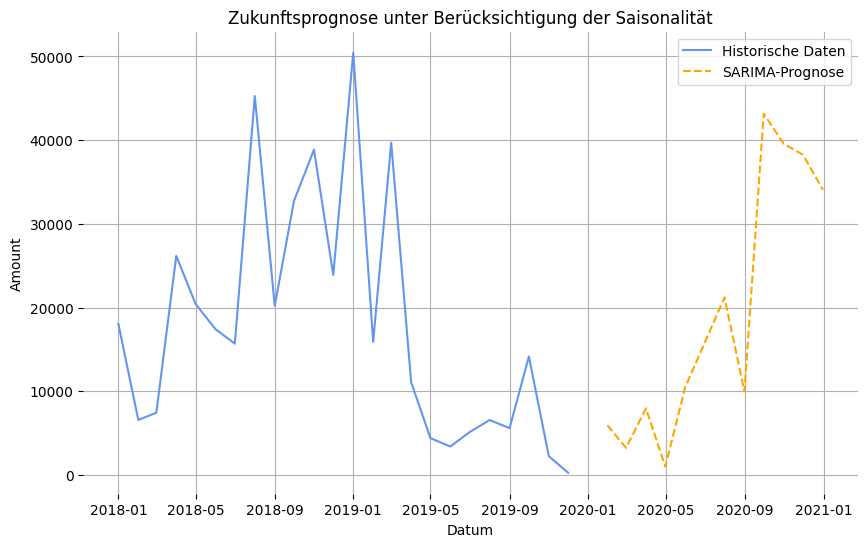

In [692]:
# Prognose für die Zukunft erstellen

future_steps = 12  # Anzahl der Monate, die prognostiziert werden sollen
future_forecast = model_fit.forecast(steps=future_steps)

plt.figure(figsize=(10, 6))
plt.plot(df_time_series.index, df_time_series['Amount'], label='Historische Daten', color='cornflowerblue')
plt.plot(pd.date_range(df_time_series.index[-1], periods=future_steps + 1, freq='M')[1:], 
         future_forecast, label='SARIMA-Prognose', linestyle='--', color='orange')
plt.title('Zukunftsprognose unter Berücksichtigung der Saisonalität')
plt.xlabel('Datum')
plt.ylabel('Amount')
plt.legend()
plt.grid()

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.show()

## Аnalyse des Verkaufs an Wochentagen

In [693]:
df_total['Weekday'] = df_total['Order Date'].dt.weekday
weekday_sales = df_total.groupby('Weekday')['Amount'].sum().reset_index()

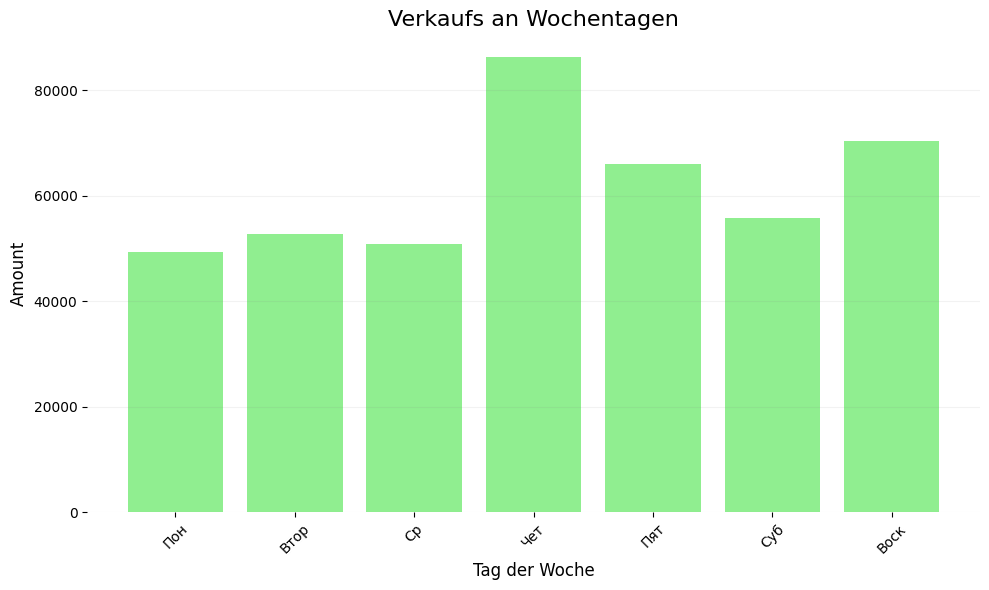

In [694]:
plt.figure(figsize=(10, 6))
plt.bar(weekday_sales['Weekday'], weekday_sales['Amount'], color='lightgreen')

plt.title('Verkaufs an Wochentagen', fontsize=16)
plt.xlabel('Tag der Woche', fontsize=12)
plt.ylabel('Amount', fontsize=12)

plt.xticks(ticks=range(7), labels=['Пон', 'Втор', 'Ср', 'Чет', 'Пят', 'Суб', 'Воск'], rotation=45)

plt.grid(True, axis='y', color='gray', alpha=0.1)

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

Korrelationsanalyse

In [695]:
correlation_matrix = df_total_target[['Quantity', 'Profit', 'Amount', 'Achievement (%)']].corr()

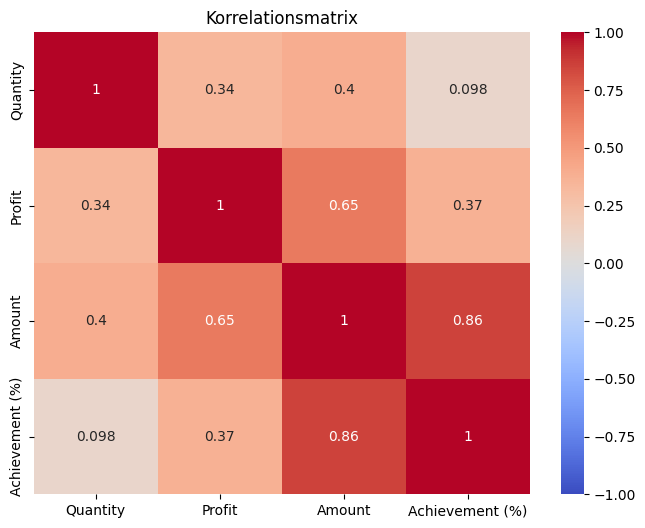

In [696]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Korrelationsmatrix')
plt.show()

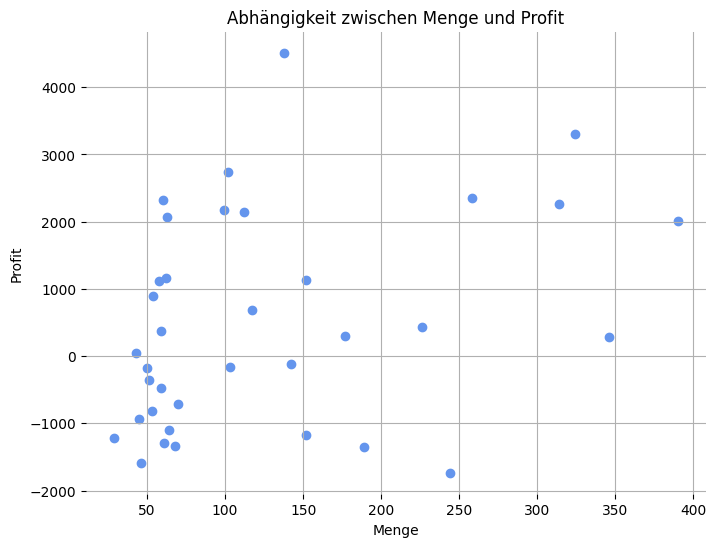

In [697]:
plt.figure(figsize=(8, 6))
plt.scatter(df_total_target['Quantity'], df_total_target['Profit'], color='cornflowerblue')
plt.title('Abhängigkeit zwischen Menge und Profit')
plt.xlabel('Menge')
plt.ylabel('Profit')

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.grid(True)
plt.show()

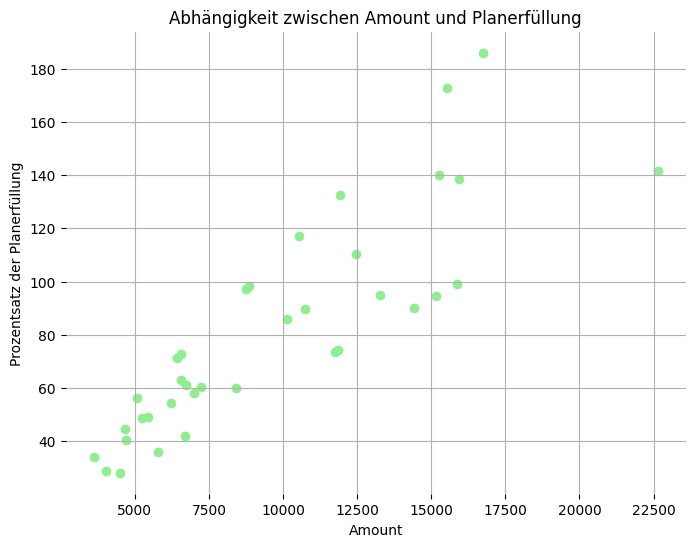

In [698]:
# Scatterplot für die Abhängigkeit zwischen Umsatz und Planerfüllung
plt.figure(figsize=(8, 6))
plt.scatter(df_total_target['Amount'], df_total_target['Achievement (%)'], color='lightgreen')
plt.title('Abhängigkeit zwischen Amount und Planerfüllung')
plt.xlabel('Amount')
plt.ylabel('Prozentsatz der Planerfüllung')

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.grid(True)
plt.show()

## Bestimmung von Kategorien und Regionen mit niedriger Planerfüllung

In [699]:
print('Durchschnittlicher Prozentsatz der Planerfüllung für alle Kategorien und Regionen:', round(df_total_target['Achievement (%)'].mean(), 2), '%')

Durchschnittlicher Prozentsatz der Planerfüllung für alle Kategorien und Regionen: 81.82 %


In [701]:
# Bestimmung der Kategorien mit niedriger Planerfüllung (<70%)
low_performance = df_total_target[df_total_target['Achievement (%)'] < 70]

print("Kategorien mit niedriger Planerfüllung:")
low_performance

Kategorien mit niedriger Planerfüllung:


,Month,Category,Amount,Profit,Quantity,Month of Order Date,Target,Achievement (%)
2,2018-04,Furniture,6570.0,-182.0,50,2018-04-01,10400.0,63.173077
3,2018-05,Clothing,6986.0,300.0,177,2018-05-01,12000.0,58.216667
5,2018-05,Furniture,4677.0,-481.0,59,2018-05-01,10500.0,44.542857
6,2018-06,Clothing,7238.0,-1735.0,244,2018-06-01,12000.0,60.316667
8,2018-06,Furniture,3622.0,-930.0,45,2018-06-01,10600.0,34.169811
9,2018-07,Clothing,4020.0,-116.0,142,2018-07-01,14000.0,28.714286
11,2018-07,Furniture,5249.0,-352.0,51,2018-07-01,10800.0,48.601852
15,2018-09,Clothing,8414.0,-1350.0,189,2018-09-01,14000.0,60.100000
16,2018-09,Electronics,5068.0,-815.0,53,2018-09-01,9000.0,56.311111
17,2018-09,Furniture,6728.0,-1344.0,68,2018-09-01,11000.0,61.163636


Bestimmung der Regionen und Kategorien mit niedriger Planerfüllung

In [702]:
regional_sales = df_total.groupby(['State', 'Category']).agg({
    'Amount': 'sum',
    'Profit': 'sum'
}).reset_index()

In [703]:
regional_sales['State_Category'] = regional_sales['State'].astype(str) + " (" + regional_sales['Category'].astype(str) + ")"
regional_sales = regional_sales.sort_values(by='Profit')

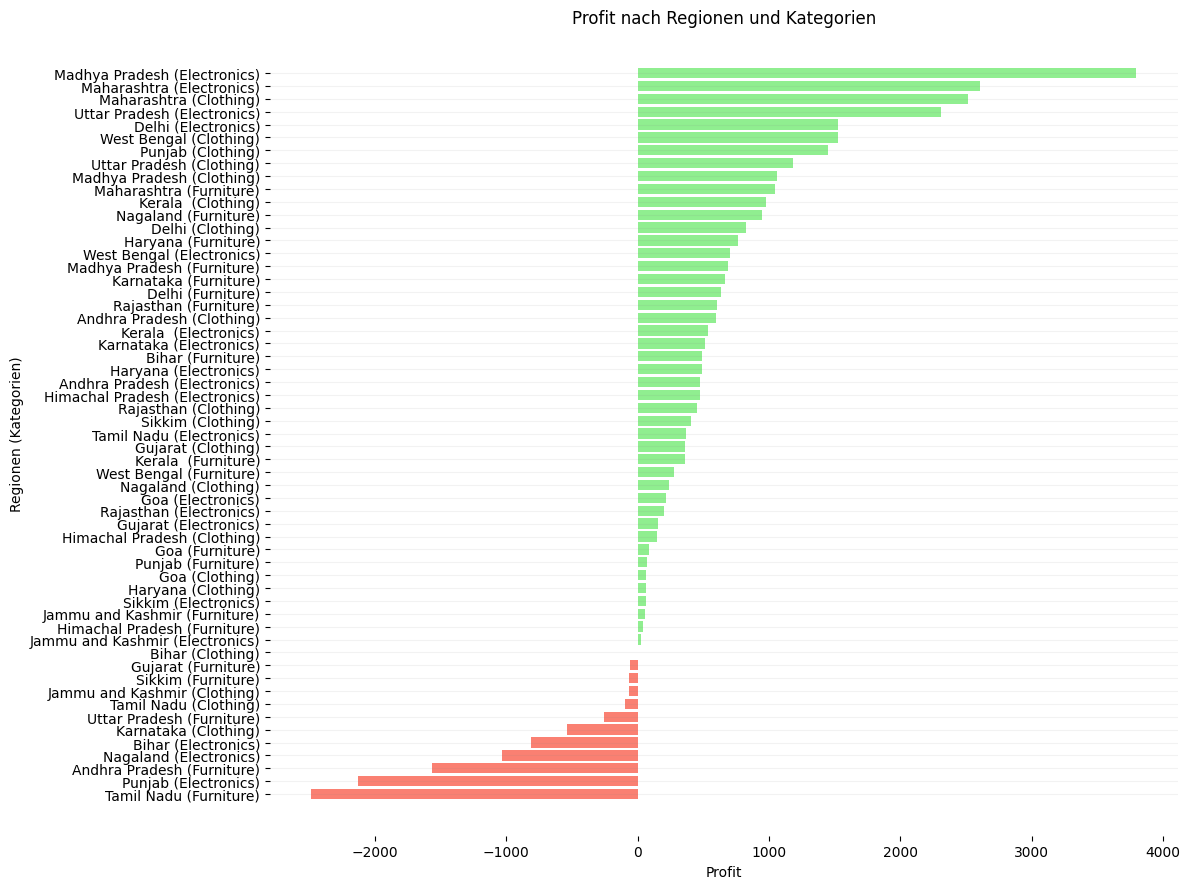

In [704]:
plt.figure(figsize=(12, 9))
colors = ['salmon' if x < 0 else 'lightgreen' for x in regional_sales['Profit']]
plt.barh(regional_sales['State_Category'], regional_sales['Profit'], color=colors)
plt.title('Profit nach Regionen und Kategorien')
plt.xlabel('Profit')
plt.ylabel('Regionen (Kategorien)')

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.grid(True, axis='y', color='gray', alpha=0.1)
plt.show()